In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
import requests
import matplotlib.patches as mpatches
csv_path = "Source Databases/SAE Energy Output 2015.csv"
data=pd.read_csv(csv_path)
data.head(5)


,Country Name,Country Code,UN Status,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
0,United States,USA,Developed,2015,YR2015,100,100,100,100,5.40839254,568439.0,13.228593,5097931.0,8.716935867,4297048,5.848306e+07
1,United Kingdom,GBR,Developed,2015,YR2015,100,100,100,100,3.017314468,83551.0,24.840050,429157.5,8.711685574,336356,4.926228e+06
2,Belgium,BEL,Developed,2015,YR2015,100,100,100,100,4.741274111,14466.0,20.800023,128345.2,9.201640531,69548,1.394808e+06
3,France,FRA,Developed,2015,YR2015,100,100,100,100,4.101853699,89357.0,15.857667,760300.4,13.49926232,563494,5.632163e+06
4,Germany,DEU,Developed,2015,YR2015,100,100,100,100,3.603094155,187366.0,29.231770,1183042.0,14.2062527,640967,8.327615e+06


In [2]:
#country=data["Country Name"]

developed_df=data[data['UN Status'] == 'Developed']
developing_df=data[data['UN Status'] == 'Developing']
transition_df=data[data['UN Status'] == 'Transition']
other_df=data[data['UN Status'] == 'Other']


In [3]:
#def boxplot(data1):
    #renew_output1=data1["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"]
    #renew_percent1=data1["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"]
    #hist=plt.boxplot(renew_output1.astype(np.float))

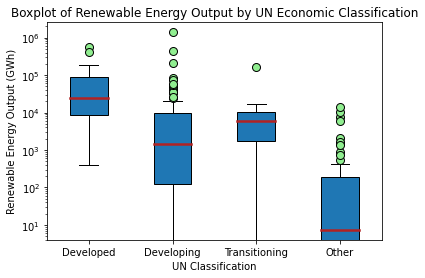

<Figure size 432x288 with 0 Axes>

In [4]:
renew_output1=developed_df["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"]
renew_output2=developing_df["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"]
renew_output3=transition_df["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"]
renew_output4=other_df["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"]

labels=['Developed', 'Developing', 'Transitioning', 'Other']

flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=8)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
fig, ax = plt.subplots()
energy_output_boxplot=plt.boxplot([renew_output1, renew_output2, renew_output3, renew_output4], flierprops = flierprops, medianprops = medianprops, patch_artist=True)
plt.xlabel('UN Classification')
plt.ylabel('Renewable Energy Output (GWh)')
plt.title('Boxplot of Renewable Energy Output by UN Economic Classification')
plt.xticks([1, 2, 3, 4], labels)
ax.set_yscale('log')


fig= plt.gcf()
plt.show()
plt.draw()
fig.savefig('renew_energy_boxplot_by_un.png', dpi= 380)

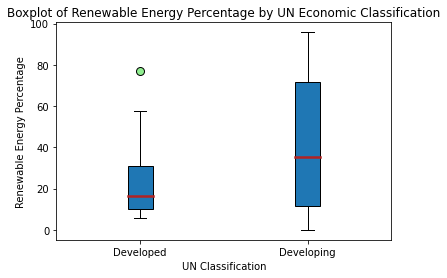

<Figure size 432x288 with 0 Axes>

In [5]:
renew_per1=developed_df["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(np.float)
renew_per2=developing_df["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(np.float)
#renew_per3=transition_df["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(np.float)
#renew_per4=other_df["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(np.float)

labels=['Developed', 'Developing']

flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=8)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
fig, ax = plt.subplots()
unrenew_boxplot=plt.boxplot([renew_per1, renew_per2], flierprops = flierprops, medianprops = medianprops, patch_artist=True)
plt.xlabel('UN Classification')
plt.ylabel('Renewable Energy Percentage')
plt.title('Boxplot of Renewable Energy Percentage by UN Economic Classification')
plt.xticks([1, 2], labels)
ax.set_yscale('linear')


fig3= plt.gcf()
plt.show()
plt.draw()
fig3.savefig('renew_energy_percent_boxplot_by_un.png')

NameError: name 'renew_per3' is not defined

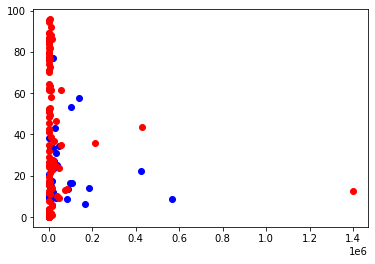

In [6]:
ax = plt.gca()

ax.scatter(renew_output1,renew_per1, color = 'b')
ax.scatter(renew_output2,renew_per2, color = 'r')
ax.scatter(renew_output3,renew_per3, color = 'g')
ax.set_yscale('log')
ax.set_xscale('linear')

In [ ]:
labels=['Developed', 'Developing', 'Transitioning', 'Other']

flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=8)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
fig, ax = plt.subplots()
unrenew_histplot=plt.hist([renew_output1, renew_output2, renew_output3, renew_output4])
plt.xlabel('UN Classification')
plt.ylabel('Renewable Energy Output (GWh)')
plt.title('Boxplot of Renewable Energy Output by UN Economic Classification')
plt.legend('upper right')
ax.set_yscale('log')

plt.show()


In [7]:
st.normaltest(renew_per1)


NormaltestResult(statistic=17.234568966023577, pvalue=0.00018095096355095314)

In [8]:
csv_path1 = "Source Databases/WTI Data.csv"
data_oil=pd.read_csv(csv_path1)
data_oil.head(5)

,DATE,DCOILWTICO
0,1990-09-10,30.83
1,1990-09-11,30.29
2,1990-09-12,30.85
3,1990-09-13,31.20
4,1990-09-14,31.79


In [9]:
csv_path_gdp = "WorldBankGDP.csv"
data_gdp=pd.read_csv(csv_path_gdp)
data_gdp.head(5)

csv_path_energy = "Source Databases/SAE Energy Output 2015.csv"
data_energy=pd.read_csv(csv_path_energy)
data_energy.head(5)

countryList=["DEU","FRA","ITA","SWE","POL","ESP","NLD","GRC","ROU","HRV","DNK","IRL","BGR","BEL","PRT","AUT","CZE","FIN","HUN","LUX",
             "CYP","LTU","SVN","MLT","EST","LVA","SVK","USA","GBR","CHN"]
results=''
WB_Data=[]
for country in countryList:
    url=f"http://api.worldbank.org/v2/country/{country}/indicator/NY.GDP.MKTP.PP.CD?format=json&date=1990:2019"

    results=requests.get(url).json()
    for entry in results[1]:
        yearDict={"Country Code":entry["countryiso3code"],"Date":entry["date"],"GDP":entry["value"]}
        WB_Data.append(yearDict)
WB_DF=pd.DataFrame(WB_Data)
gdp_2015=WB_DF[WB_DF['Date'] == '2015']
gdp_2015.head(5)
gdp_2015=gdp_2015.merge(data_energy, how='right', on='Country Code')



In [10]:

gdp_2015.dropna(inplace=True)
gdp_2015

,Country Code,Date,GDP,Country Name,UN Status,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
0,DEU,2015,3.895127e+12,Germany,Developed,2015,YR2015,100,100,100,100,3.603094155,187366.0,29.231770,1183042.000,14.2062527,640967,8.327615e+06
1,FRA,2015,2.719223e+12,France,Developed,2015,YR2015,100,100,100,100,4.101853699,89357.0,15.857667,760300.400,13.49926232,563494,5.632163e+06
2,ITA,2015,2.241525e+12,Italy,Developed,2015,YR2015,100,100,100,100,3.072198971,108906.0,38.679225,778697.100,16.51685058,281562,4.714562e+06
3,SWE,2015,4.812998e+11,Sweden,Developed,2015,YR2015,100,100,100,100,4.269061194,102442.0,63.262748,679811.900,53.2477698,161931,1.276696e+06
4,POL,2015,1.020174e+12,Poland,Developed,2015,YR2015,100,100,100,100,4.135685203,22683.0,13.802399,302285.700,11.91148821,164341,2.537766e+06
5,ESP,2015,1.621504e+12,Spain,Developed,2015,YR2015,100,100,100,100,3.327359042,97088.0,34.949891,513540.800,16.25409774,277792,3.159454e+06
6,NLD,2015,8.521132e+11,Netherlands,Developed,2015,YR2015,100,100,100,100,3.936630335,13695.0,12.442082,107380.200,5.889463079,110070,1.823260e+06
7,GRC,2015,2.911091e+11,Greece,Developed,2015,YR2015,94.31,100,100,100,3.72312235,14850.0,28.655783,112744.200,17.17004755,51822,6.566330e+05
8,ROU,2015,4.286415e+11,Romania,Developed,2015,YR2015,85.33,100,100,100,3.52,26202.0,39.746974,211769.100,23.69779403,65922,8.936237e+05
9,HRV,2015,9.673963e+10,Croatia,Developed,2015,YR2015,92.28,100,100,100,4.053076043,7510.0,66.826838,89589.790,33.12746664,11238,2.704396e+05


The correlation between both factors is 0.9


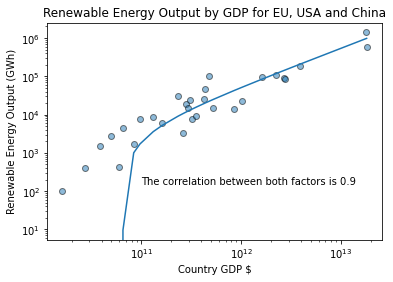

<Figure size 432x288 with 0 Axes>

In [11]:
gdp_2015=gdp_2015.sort_values(["GDP", "Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"])

gdp_data=gdp_2015['GDP'].astype(float)
renew_data_scatter=gdp_2015["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"].astype(float)
fig, ax = plt.subplots()
plt.scatter(gdp_data,renew_data_scatter, alpha=.5, edgecolor='black')
plt.xlabel('Country GDP $')
plt.ylabel('Renewable Energy Output (GWh)')
plt.title('Renewable Energy Output by GDP for EU, USA and China')
ax.set_yscale('log')
ax.set_xscale('log')



slope, intercept, rvalue, pvalue, stderr = linregress(gdp_data, renew_data_scatter)
regress_values = gdp_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

reg_plot = plt.plot(gdp_data, regress_values)

correlation = st.pearsonr(gdp_data, renew_data_scatter)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

ax.text(10e10,15e1 , f"The correlation between both factors is {round(correlation[0],2)}", fontsize=10)


fig2=plt.gcf()
plt.show()
plt.draw()
fig2.savefig('Renew_Energy_v_GDP_Scatter_Plot.png', dpi = 480)

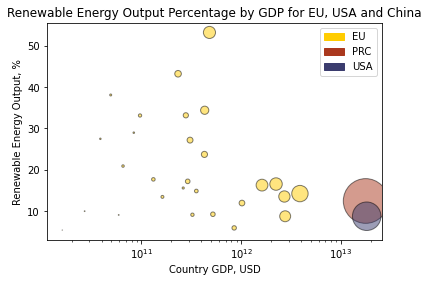

<Figure size 432x288 with 0 Axes>

In [25]:

gdp_2015=gdp_2015.sort_values(["GDP", "Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"])

gdp_data=gdp_2015['GDP'].astype(float)
renew_data_per=gdp_2015["Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"].astype(float)
renew_data_scatter_norm=renew_data_scatter/(max(renew_data_scatter)*.0005)
fig, ax = plt.subplots()

colors=['#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00','#FFCC00',
        '#FFCC00','#aa381e','#3b3c6e']

plt.scatter(gdp_data,renew_data_per, s=renew_data_scatter_norm, c=colors, alpha=.5, edgecolor='black')
plt.xlabel('Country GDP, USD')
plt.ylabel('Renewable Energy Output, %')
plt.title('Renewable Energy Output Percentage by GDP for EU, USA and China')
ax.set_yscale('linear')
ax.set_xscale('log')

handles, labels = ax.get_legend_handles_labels()
labels=['EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU','EU',
       'EU','EU','EU','EU','EU','EU','EU','EU','EU','PRC','USA']

#ax.legend(labels)
eu_patch = mpatches.Patch(color='#FFCC00', label='EU')
prc_patch = mpatches.Patch(color='#aa381e', label='PRC')
usa_patch = mpatches.Patch(color='#3b3c6e', label='USA')
plt.legend(handles=[eu_patch, prc_patch, usa_patch])

fig1=plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Renew_Energy_%_v_GDP_Scatter_Plot.png', dpi = 480)

In [14]:
gdp_2015

,Country Code,Date,GDP,Country Name,UN Status,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
23,MLT,2015,1.605901e+10,Malta,Other,2015,YR2015,100,100,100,100,1.808454095,100.0,7.674597,1026.089,5.355004746,1303,1.916131e+04
20,CYP,2015,2.688978e+10,Cyprus,Developed,2015,YR2015,100,100,100,100,3.274623243,398.0,8.780057,5857.732,9.942066016,4533,5.891866e+04
24,EST,2015,3.866919e+10,Estonia,Other,2015,YR2015,92.61,100,100,100,6.317018358,1502.0,14.418739,31570.590,27.47683347,10417,1.148989e+05
25,LVA,2015,4.910382e+10,Latvia,Developed,2015,YR2015,95.05,100,100,100,3.914124071,2776.0,50.171697,58759.110,38.09801717,5533,1.542314e+05
19,LUX,2015,5.909686e+10,Luxembourg,Developed,2015,YR2015,100,100,100,100,2.872757905,431.0,32.381668,13392.290,9.031313661,1331,1.482873e+05
22,SVN,2015,6.528341e+10,Slovenia,Developed,2015,YR2015,95.99,100,100,100,4.582203127,4355.0,29.391915,40762.940,20.87739614,14817,1.952492e+05
21,LTU,2015,8.373060e+10,Lithuania,Other,2015,YR2015,100,100,100,100,3.859307269,1678.0,39.408173,57858.640,28.96117925,4258,1.997800e+05
9,HRV,2015,9.673963e+10,Croatia,Developed,2015,YR2015,92.28,100,100,100,4.053076043,7510.0,66.826838,89589.790,33.12746664,11238,2.704396e+05
12,BGR,2015,1.316584e+11,Bulgaria,Developed,2015,YR2015,88.42,100,100,100,6.384174926,8768.0,17.988593,69034.960,17.65007793,48742,3.911312e+05
26,SVK,2015,1.623025e+11,Slovak Republic,Developed,2015,YR2015,96.72,100,100,100,4.478552766,6040.0,22.679483,50516.660,13.40916822,26632,3.767322e+05
